In [1]:
import os
from collections import Counter
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
DATA_PATH='data/raw/'
files=[fl for fl in os.listdir(DATA_PATH) if fl.endswith('.txt')]

txt=''
for fl in files:
    txt_=Path(DATA_PATH+fl).read_text().lower()
    
    txt_=txt_.replace('\n', '').replace('.', ' ').replace(',', ' ').replace('!', ' ').\
    replace('?', ' ').replace(':', ' ').replace(';', ' ').replace('™', ' ').replace('¶', ' ').\
    replace('(', ' ').replace(')', ' ').replace(']', ' ').replace('[', ' ').replace('„', ' ').\
    replace('“', ' ').replace('•', ' ').replace('¼', ' ').replace('¤', ' ')
    txt=f'{txt} {txt_}'

In [3]:
txt[:10]

' see oli l'

## Count char freq

In [4]:
cnt=Counter(txt.split())
len(cnt)

3572

In [5]:
df_cnt=pd.DataFrame(cnt.most_common(len(cnt)))
df_cnt.columns=['token', 'count']
df_cnt['prob']=np.divide(df_cnt['count'], df_cnt['count'].sum())
df_cnt['count_log']=np.log(df_cnt['count'])
df_cnt['prob_log']=np.log(df_cnt['prob'])
df_cnt.head()

,token,count,prob,count_log,prob_log
0,ã,452,0.037573,6.113682,-3.281477
1,ja,310,0.025769,5.736572,-3.658587
2,ta,192,0.015960,5.257495,-4.137663
3,kã,185,0.015378,5.220356,-4.174803
4,â€œ,156,0.012968,5.049856,-4.345303


<AxesSubplot:>

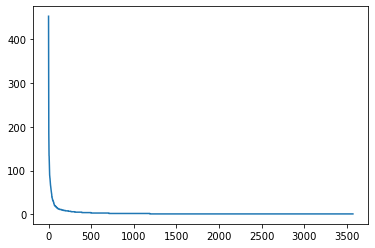

In [6]:
df_cnt['count'].plot()

<AxesSubplot:>

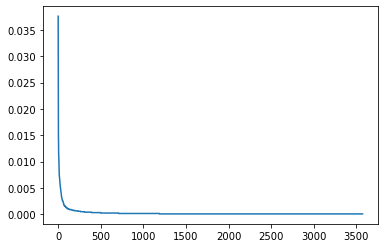

In [7]:
df_cnt['prob'].plot()

<AxesSubplot:>

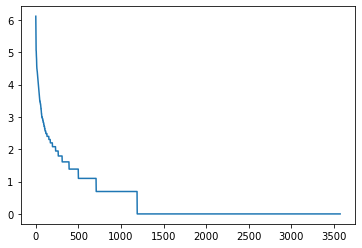

In [8]:
df_cnt['count_log'].plot()

<AxesSubplot:>

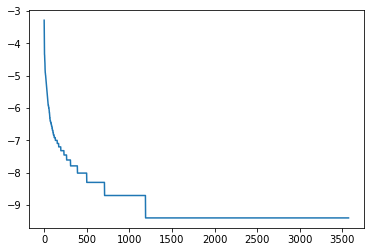

In [9]:
df_cnt['prob_log'].plot()

<AxesSubplot:xlabel='count_log', ylabel='prob_log'>

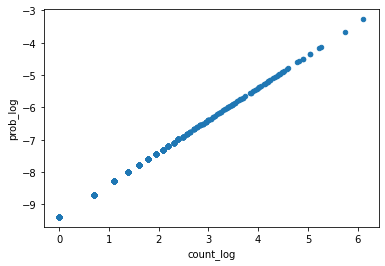

In [10]:
df_cnt.plot.scatter('count_log','prob_log')

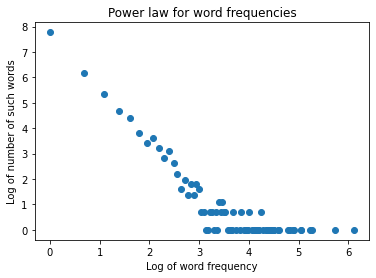

In [11]:
counter_of_words = Counter(txt.split())
counter_of_counts = Counter(counter_of_words.values())
word_counts = np.array(list(counter_of_counts.keys()))
freq_of_word_counts = np.array(list(counter_of_counts.values()))
plt.scatter(np.log(word_counts), np.log(freq_of_word_counts))
plt.xlabel('Log of word frequency')
plt.ylabel('Log of number of such words')
plt.title('Power law for word frequencies')
plt.show();

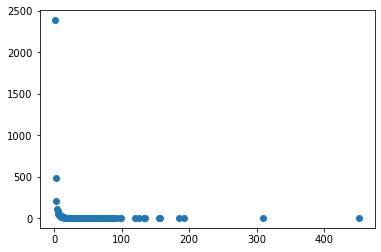

In [12]:
plt.scatter(word_counts, freq_of_word_counts)

## Estimate slope

In [13]:
def neg_zipf_likelihood(s):
    n = sum(freq_of_word_counts)
    # for each word count, find the probability that a random word has such word count
    probas = word_counts ** (-s) / np.sum(np.arange(1, n+1) **(-s))
    log_likelihood = sum(np.log(probas) * word_counts)
    return -log_likelihood

from scipy.optimize import minimize_scalar
s_best = minimize_scalar(neg_zipf_likelihood, [0.1, 3.0] )
print(s_best.x)

0.8792971547915152


## Exponential vs power law

In [30]:
x=np.arange(1, 1000)[::-1]
const=3
y_p=0.000003*x**const
y_e=1.01**x

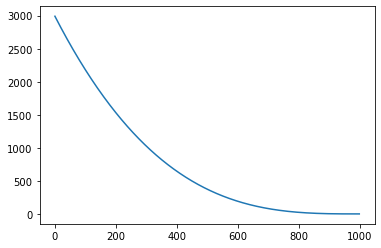

In [31]:
plt.plot(y_p)

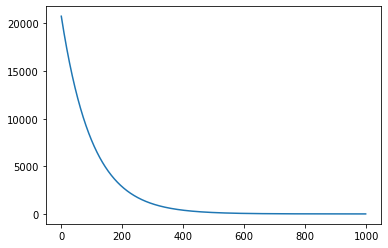

In [23]:
plt.plot(y_e)

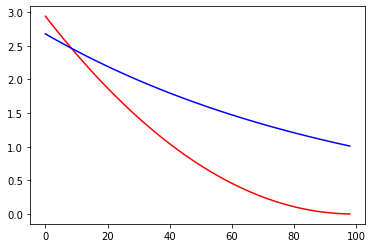

In [17]:
plt.plot(y_p, color='red')
plt.plot(y_e, color='blue')

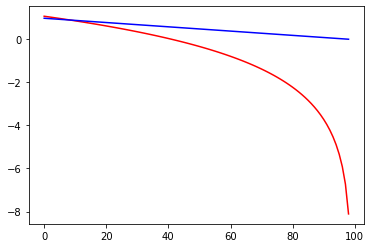

In [18]:
plt.plot(np.log(y_p), color='red')
plt.plot(np.log(y_e), color='blue')

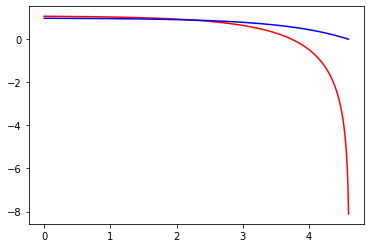

In [19]:
plt.plot(np.log(x)[::-1], np.log(y_p), color='red')
plt.plot(np.log(x)[::-1], np.log(y_e), color='blue')

In [20]:
np.log(x)[::-1]

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

## Example: https://notebook.community/puolival/power-law/powerlaw

In [32]:
def random(size=1, xmin=1, alpha=1.5):
    """Draw random numbers from a power-law distribution using the inverse
    random sampling method.

    Input arguments:
    size  - Sample size
    xmin  - Minimum value for which the power-law holds
    alpha - Scaling exponent of the power-law distribution
    """
    rvs = np.random.random(size=size)
    return float(xmin) * (1.-rvs) ** (-1. / (float(alpha)-1.))

In [81]:
-1. / (float(2.5)-1.)

-0.6666666666666666

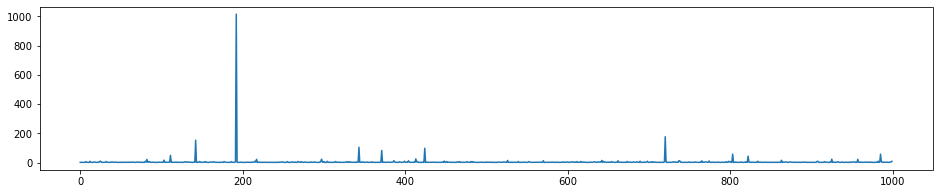

In [34]:
rvs = random(size=1000, xmin=1, alpha=2.5)
plt.figure(figsize=(16, 3)); 
plt.plot(rvs); 
plt.show()

In [35]:
def plot_ccdf(rvs):
    """Plot complementary cumulative distribution function (CCDF) of
    a possibly power-law distributed sample.

    Input arguments:
    rvs   - Analyzed random sample
    """
    # Calculate complementary CDF
    n = np.size(rvs)
    xcdf, ycdf = np.sort(rvs), np.arange(n, 0, -1) / float(n)

    # Visualize the CDF
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    ax1.loglog(xcdf, ycdf, 'o', fillstyle='none')

def mle_alpha(rvs, xmin):
    """Maximum likelihood (ML) estimate of the scaling parameter
    alpha."""
    # Select observation larger than or equal to xmin
    rvs = rvs[rvs>=xmin]
    n = np.size(rvs)

    return 1. + n * (1. / np.sum(np.log(rvs / float(xmin))))

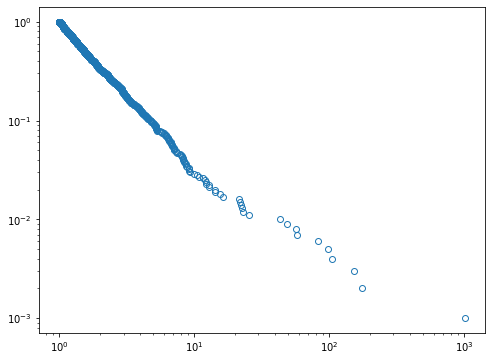

In [36]:
plot_ccdf(rvs)

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_31564\3915412209.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.sort(rvs)), np.log((np.array(list(range(len(rvs))))/len(rvs))[::-1]), 'bo')


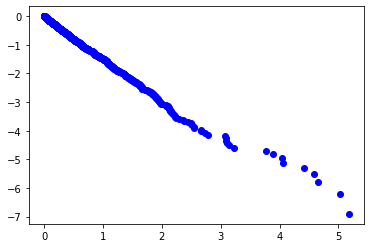

In [69]:
plt.plot(np.log(np.sort(rvs)), np.log((np.array(list(range(len(rvs))))/len(rvs))[::-1]), 'bo')

In [49]:
#scaling parameter
mle_alpha(rvs, xmin=1)

2.5115394387429877

In [72]:
rvs.max()

1014.4448362044759

In [73]:
rvs.min()

1.0002929732930939

In [75]:
np.log(np.sort(rvs))

array([2.92930385e-04, 3.82171329e-04, 1.31438841e-03, 1.63384990e-03,
       2.34737202e-03, 2.67921067e-03, 3.14006219e-03, 6.26554122e-03,
       6.37898184e-03, 6.38181508e-03, 6.60857105e-03, 7.87555803e-03,
       8.85893326e-03, 9.36957219e-03, 9.66699852e-03, 9.95025644e-03,
       1.10547661e-02, 1.22839359e-02, 1.27661050e-02, 1.45339069e-02,
       1.48631581e-02, 1.48934230e-02, 1.60579618e-02, 1.64703770e-02,
       1.73226610e-02, 1.74220247e-02, 1.78865123e-02, 1.84924690e-02,
       1.92360570e-02, 1.97254004e-02, 1.98763380e-02, 2.15207064e-02,
       2.44519711e-02, 2.50839752e-02, 2.65197419e-02, 2.76885099e-02,
       2.76990025e-02, 2.89084828e-02, 2.92775788e-02, 2.96756789e-02,
       2.97800814e-02, 2.98542629e-02, 3.12072918e-02, 3.14458894e-02,
       3.15610202e-02, 3.29763164e-02, 3.35285778e-02, 3.36999680e-02,
       3.46194083e-02, 3.48205869e-02, 3.75255902e-02, 3.79609292e-02,
       3.94054647e-02, 4.11358139e-02, 4.17841649e-02, 4.21619021e-02,
      

In [76]:
np.sort(rvs)

array([1.00029297e+00, 1.00038224e+00, 1.00131525e+00, 1.00163519e+00,
       1.00235013e+00, 1.00268280e+00, 1.00314500e+00, 1.00628521e+00,
       1.00639937e+00, 1.00640222e+00, 1.00663046e+00, 1.00790665e+00,
       1.00889829e+00, 1.00941360e+00, 1.00971387e+00, 1.00999992e+00,
       1.01111610e+00, 1.01235969e+00, 1.01284794e+00, 1.01464004e+00,
       1.01497416e+00, 1.01500488e+00, 1.01618758e+00, 1.01660676e+00,
       1.01747357e+00, 1.01757467e+00, 1.01804743e+00, 1.01866451e+00,
       1.01942226e+00, 1.01992123e+00, 1.02007519e+00, 1.02175395e+00,
       1.02475337e+00, 1.02540123e+00, 1.02687452e+00, 1.02807540e+00,
       1.02808619e+00, 1.02933039e+00, 1.02971038e+00, 1.03012039e+00,
       1.03022794e+00, 1.03030437e+00, 1.03169934e+00, 1.03194553e+00,
       1.03206435e+00, 1.03352606e+00, 1.03409700e+00, 1.03427424e+00,
       1.03522564e+00, 1.03543392e+00, 1.03823857e+00, 1.03869065e+00,
       1.04019216e+00, 1.04199361e+00, 1.04266941e+00, 1.04306334e+00,
      

In [79]:
np.e**2.92930385e-04

1.0002929732932948